# **MÓDULO 21 - Projeto de Credit Score - Árvore de Decisão**


No módulo 17, vocês realizaram a primeira etapa do projeto de crédito de vocês. Então fizeram o tratamendo dos dados, balancearam as classes, transformaram as variáveis categóricas e separam base de treino e teste. Já no módulo 14, aplicaram a base já tratada o algoritmo de Naive Bayes, onde avaliaram os resultados das previsões. Nesse módulo aplicaremos a nossa base o algoritmo da árvore de decisão.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1) Comece carregando as bases de treino (X e y) e teste (X e y).
Verifique se o número de linhas condiz, se as variáveis estão corretas sendo apenas a de score para y e as demais nas bases de X e por último, se Y está balanceada no teste.

In [2]:
# Carregando a base de dados

X_train = pd.read_csv('X_train_balanced.csv', delimiter=',')
X_test = pd.read_csv('X_test.csv', delimiter=',')
y_train = pd.read_csv('y_train_balanced.csv', delimiter=',').squeeze('columns')
y_test = pd.read_csv('y_test.csv', delimiter=',').squeeze('columns')

# Verificando se o número de linhas e colunas condiz

print('X_train:', X_train.shape, '| X_test:', X_test.shape)
print('y_train:', y_train.shape, '| y_test:', y_test.shape)

# Verificando a coluna que está em y

print('\n', y_train, '\n') 

# Verificando e y está balanceado

print(y_train.value_counts(normalize=True) * 100)

# Todos os dados estão corretos

X_train: (261, 10) | X_test: (41, 10)
y_train: (261,) | y_test: (41,)

 0      1
1      1
2      2
3      1
4      0
      ..
256    2
257    2
258    2
259    2
260    2
Name: Credit Score Encoded, Length: 261, dtype: int64 

Credit Score Encoded
1    33.333333
2    33.333333
0    33.333333
Name: proportion, dtype: float64


# 2) Explique com suas palavras, qual o passo a passo para a aplicação do algoritmo da árvore de decisão, não esqueça de citar a etapa de avaliação do modelo e também como podemos melhorar nosso modelo.

In [3]:
# Aqui terá a explicação do 0

# A parte geral, que serve para qualquer modelo:

# Primeiro: precisamos coletar os dados e fazer um pré-processamento neles. Nessa parte lidaremos com valores nulos e outliers, além de fazer correções, normalizar os dados, ajustar os nomes das colunas se necessário e remover duplicatas. Também é possível remover colunas que não serão úteis (um exemplo seria a coluna de CPF). Essa é uma das partes mais importantes, pois ela afeta diretamente o modelo, logo cautela e coerência são essenciais. Após 'lapidar' os dados, iniciamos a modelagem: transformamos valores categóricos em numéricos, dividimos os dados em X e y, onde y contém a coluna alvo (a principal), e X terá o resto das colunas. É importante verificar se a separação foi feita de forma correta, se há apenas uma coluna em y (a alvo) e todas as demais em X. Depois dividimos os dados entre treino e teste, sendo o treino para ensinar o modelo e dar uma ideia inicial do aprendizado, e o teste para verificar de fato sua qualidade, descobrindo se o modelo entendeu bem as variáveis e consegue generalizar os dados. Com treino e teste definidos, verificamos se o número de linhas de X e y é igual em ambos; se estiverem, fazemos uma checagem adicional para ver se os dados de y estão balanceados no treino. Caso não estejam, é importante balancear (essa etapa é essencial, pois um desbalanceamento grande fará com que o modelo crie viés e não consiga generalizar, tendendo sempre para a classe majoritária).

# A parte mais voltada para o modelo de Árvore de Decisão:

# Após todas as verificações, finalmente criaremos o modelo, no caso, a árvore de decisão, e, nesse exercício, de classificação. Treinaremos o modelo com X e y de treino usando .fit(). Logo após o treinamento, já é interessante utilizar a função .predict() no treino e verificar como está o entendimento dos dados. Para isso podemos usar o classification_report, que mostra métricas úteis para avaliar a capacidade do modelo, como acurácia, recall e precision. Esses primeiros resultados tendem a ser bem otimistas, então não devemos nos basear apenas neles: servem como um 'norte' para entender se o modelo aprendeu e identificar possíveis erros quando compararmos com o desempenho em teste. Por exemplo, se o modelo foi bem no treino mas mal no teste, isso indica overfitting (aprendeu os dados de treino mas não consegue generalizar). Após avaliar o treino, fazemos .predict() no teste (lembrando: no treino balanceamos y, mas no teste mantemos como está, pois no dia a dia os dados não estarão balanceados). Depois aplicamos novamente o classification_report para verificar a real proficiência do modelo.

# Entendendo as métricas principais:

# Accuracy, ela diz em ralação as todo, quantas previsões o modelo consegui acertar, em um contexto macro ela é muito boa, pois com ela conseguimos ver mais ou menos quão bem o modelo entendeu os dados, e se ele conseguiu generalizar bem o que ele aprendeu, principalmente após comparar a acurácia de treino e teste, pois após a comparação é possível descobrir, por exemplo, se o modelo está fazendo overfitting. Essa métrica é muito boa para ter uma visão geral, mas quando se busca algo mais específico acaba existindo outras métricas melhores para entender o resultados do modelo.

# Recall, a melhor forma para entender o recall é com uma frase: De todos os positivos do data, quantos eu consegui acertar? Essa frase facilita muito seu entendimento, pois pense um exemplo, o data é sobre descobrir se a pessoa tem olho azul ou verde, o recall do modelo tendo em base olho verde, seria, nos dados, de todos os olhos verde, quantos eu consegui dizer era verde. Essa métrica é muito útil quando um dos valores da coluna alvo é mais importante que outro, pois aí você vai avaliar se o modelo está bom se ele estiver acertando o valor que você está procurando, logo, no mesmo exemplo, se você procura quem tem olhos verdes, o modelo só acerta quem tem olho azul, mesmo uma acurácia boa (Lembrando, os valores do teste não estão balanceados...), o modelo não seria muito bom pra você nesse momento, pois você está procurando quem tem olho verde.

# Precision, como a métrica anterior, a melhor forma para entender precision é com uma frase, dos que o modelo preveu como positivo, quantos realmente eram, no exemplo dado,  Dos casos que o modelo previu como "verde", quantos realmente eram verdes. Essa métrica é bem importante também pois como a outra, te ajudar a entender melhor a proficiencia do modelo dentro do que você procura.

# Como melhorar o modelo:

# Existem várias estratégias. Primeiro, é importante identificar o problema.

# Se o modelo tem acurácia ruim tanto em treino quanto em teste, pode indicar problemas de pré-processamento (outliers, variáveis ruins).

# Se o modelo apresenta overfitting (acurácia alta no treino, mas baixa no teste), podemos aplicar poda, limitar a profundidade máxima (max_depth), definir um número mínimo de amostras por divisão (min_samples_split, min_samples_leaf) ou retirar fazer um modelo com menos colunas pode melhorar a precisão do modelo.

# Existem outras formas de melhorar, e muitas etapas podem mudar dependendo do que você está procurando e o tipo de modelo que você está utilizando mas no geral essas etapas explicam bem a rotina para criar um modelo de forma eficáz e como melhora-lo.

# 3) Aplique o algortimo da árvore de decisão aos dados de treinamento, utilizando critério de Gini e random state = 0.
Traga a acurácia para o modedlo com os dados de treino.

In [4]:
# Criando o modelo

tree_all = DecisionTreeClassifier(criterion='gini', random_state=0)

# Treinando o modelo

tree_all.fit(X_train, y_train)

# Criando as predições com o treino para ver como o modelo está se saindo

pred_train_all = tree_all.predict(X_train)

# Verificando a acurácia (OBS: O exercício pede apenas a acurácia (Poderia utilizar a função accuracy_score), mas o relatório completo considero melhor já que mostra a acurácia também)

print('Relatório do treino: ')
print(classification_report(y_train, pred_train_all))

# Insight: O modelo teve 1.0 em tudo, mostrando que ele acertou tudo, sugerindo overfitting, mas já era de se esperar um resultado alto, principalmente por ser uma árvore de decisão e o predict ser no treino, quando for feito no modelo saberemos se o modelo entendeu bem de fato, mostrando que ele sabe generalizar os dados. Se o resultado for baixo no teste, daí teremos um problema, poís isso significa que o modelo entendeu muito bem as especificações mas não consegue generalizar. Vale dizer também que esse resultado perfeito não reflete a qualidade do modelo, nem negativamente, nem positivamente, (Se tivesse max_depth talvez o resultado de predict em train teria mais peso), só mostra que ele memorizou as resposta, a avaliação real será feita em teste.

Relatório do treino: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       1.00      1.00      1.00        87
           2       1.00      1.00      1.00        87

    accuracy                           1.00       261
   macro avg       1.00      1.00      1.00       261
weighted avg       1.00      1.00      1.00       261



# 4) Aplique o modelo aos dados de teste e realize a avaliação dos resultados. Não se esqueça de avaliar com as suas palavras e comparar o desempenho da base treino com a teste.

In [5]:
# Fazendo o predict em teste

pred_test_all = tree_all.predict(X_test)

# Verificando como o modelo se saiu

print("Relatório do teste: ")
print(classification_report(y_test, pred_test_all)) 

# O desempenho do teste foi extremamente bom, aparente ser até suspeito de tão bom, mas a princípio mostra que modelo entendeu bem e conseguiu generalizar bem. Tanto no treino como treino o modelo teve um score perfeito, e demonstrou entender bem como os dados se relacionam e conseguiu classificar muito bem as variáveis, acertando todas as suas predições. O que é impressionante (OBS: Esses dados foram os mesmo dados que foram utilizado em Naives Bayes, mas o modelo não teve um resultado nem próximo, mostrando que decision tree é bem melhor ja que diferente do Naive bayes, ele não assume que as variaveis são independentes entre si). Concluindo, resultado foi muito bom, bom até demais, possívelmente indicaria algum leak/vazamento, mas procurei e não encontrei nenhum, talvez pelas classes estarem bem definidas e ter poucos dados, o modelo conseguiu entender tão bem, mas para fazer algo realmente eficáz e seguro o ideal seria adicionar um profundidade máxima para a árvore como parâmetro.

Relatório do teste: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00         7

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41



# 5) Plote a árvore de decisão.
É possível fazer uma avaliação visual? Qual a profundidade da árvore?

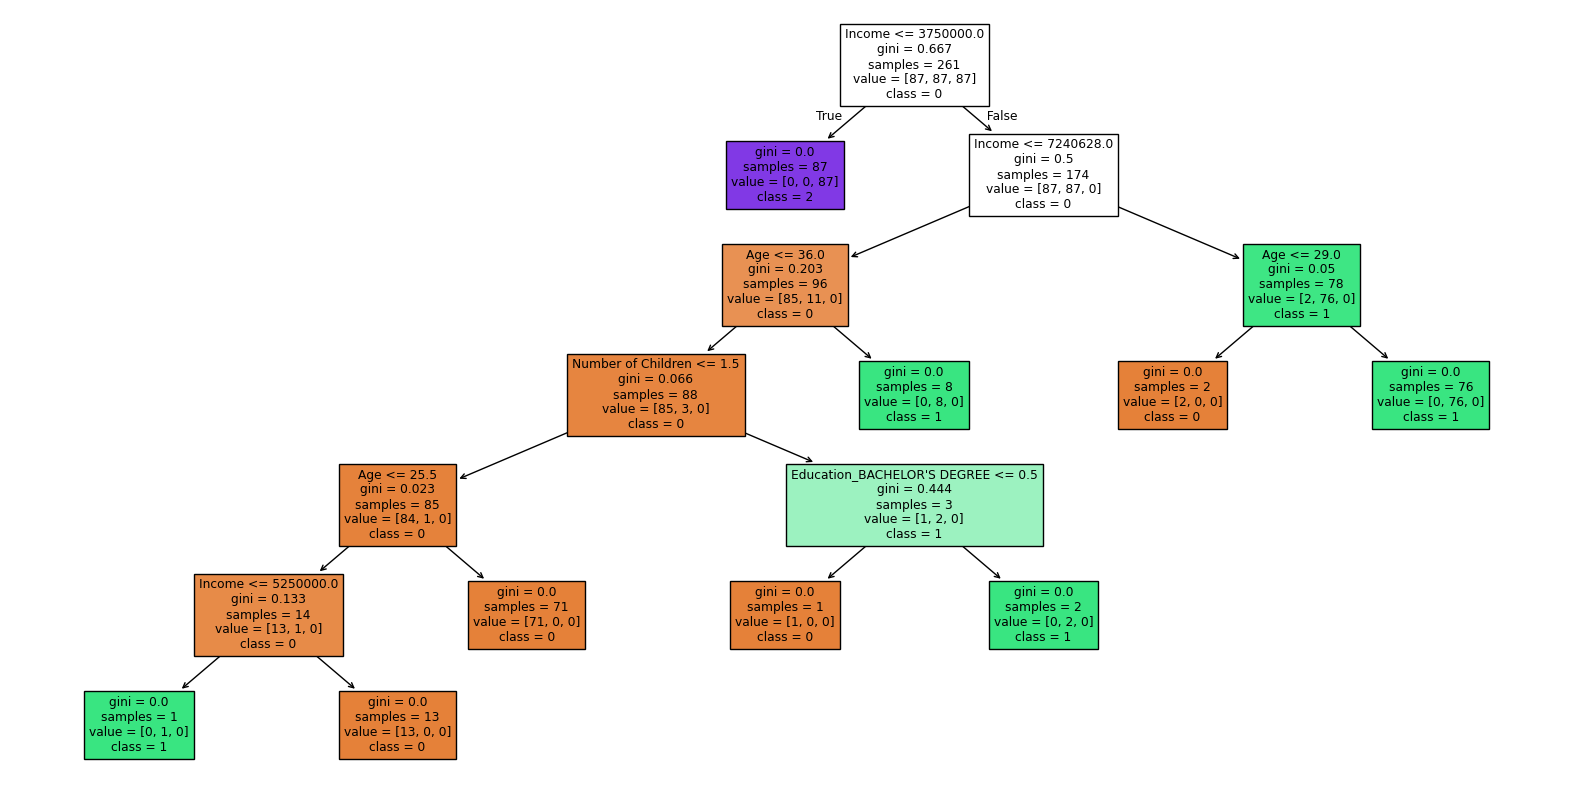

Profundidade da árvore: 6


In [6]:
plt.figure(figsize=(20,10))
plot_tree(tree_all, filled=True, feature_names=X_train.columns, class_names=['0', '1', '2'])
plt.show()

print("Profundidade da árvore:", tree_all.tree_.max_depth)

# Com a árvore é possível fazer uma avaliação visual sim, e uma das coisas principais que vemos e o que provavelmente é o motivo da accuracy tão alta é que ele conseguiu separar muitos dados com regras simples, ele percebeu que income é muito importante e age também, forte indicação o modelo pode ter um viés por ter muitas folhas puras, gini = 0. A profundidade da árvore é 6

# 6) Identifique as 2 principais features do modelo.


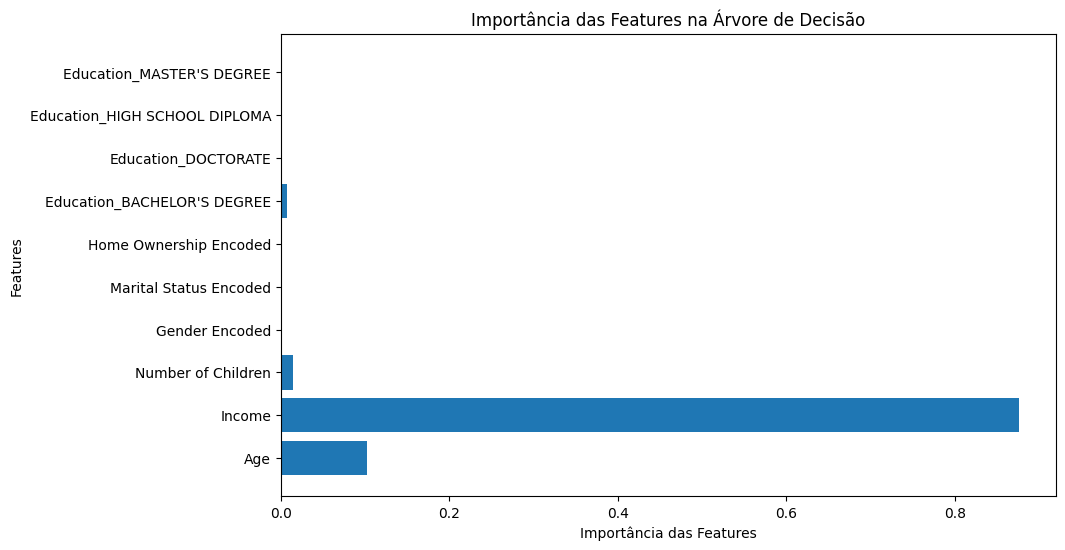

In [7]:
# Verificando quais são as features mais importantes (Mesmo que pela árvore já seja possível ter uma idéia)

imp_features = tree_all.feature_importances_

# Pegando os nomes das colunas

nomes_features = X_train.columns

# Plotando um gráfico para visualizar a ordem de importância das features
# Criando um gráfico de barras para visualizar a importância das características
plt.figure(figsize=(10, 6))
plt.barh(nomes_features, imp_features)
plt.xlabel('Importância das Features')
plt.ylabel('Features')
plt.title('Importância das Features na Árvore de Decisão')
plt.show()

# As duas features mais importantes nesse caso são Income e Age (Renda e idade)
# Isso confirma o que já vimos na visualização da árvore: o modelo se apoia fortemente na renda e na idade para separar as classes, o que pode indicar dependência excessiva dessas variáveis.

# 7) Rode um modelo de árvore de decisão apenas com as 2 principais features encontradas. E avalie os resultados. Para você o desempenho da árvore está melhor que o modelo anterior? Justifique.

In [ ]:
# Criando o modelo utilizando gini

tree_2m = DecisionTreeClassifier(criterion = 'gini', random_state=0)

# Separando as 2 features mais importante

X_train_2m = X_train[['Income', 'Age']]
X_test_2m = X_test[['Income', 'Age']]

# Fazendo uma verificação

X_train_2m.head(5)
X_test_2m.head(5)

# Treinando o modelo

tree_2m.fit(X_train_2m, y_train)

# Verificando resultado em treino

pred_train_2m = tree_2m.predict(X_train_2m)
print('Relatório de treino: ')
print(classification_report(y_train, pred_train_2m))

# Insight: Como esperado e resultado foi perfeito (accuracy = 1.0), provavelmente, como no outro caso, por ser uma verificação no treino e estamos utilizando decision tree, logo ele consegue entender e separar muito bem as variáveis. (Comum e decision tree)

# Verificando resultado em teste

pred_test_2m = tree_2m.predict(X_test_2m)
print('Relatório de teste: ')
print(classification_report(y_test, pred_test_2m))

# Insight: No teste, o modelo performou muito bem com accuracy de 0,95 e macro F1 de 0,95, o que é impressionante considerando que usamos só Income e Age. O ponto a observar é a precision da classe 0 (0,80): o modelo acerta todos os verdadeiros 0 (recall=1,00), mas gera alguns falsos positivos quando prevê 0. No geral, esse modelo com 2 features ficou um pouco abaixo do modelo com todas as variáveis (que foi 1,00 no teste), mas ainda generaliza bem e é mais simples de interpretar — o que reforça o quanto Income (e, em segundo lugar, Age) já carregam grande parte do veredito para o credit score, o que pode ser um viés mas não necessariamente é, já que a sua renda afeta diretamente no seu score de crédito em várias bancos, mas não é a única coisa, mostrando que utilizar as outras variáveis melhoram sim a precisão do modelo, e por isso o outro modelo se saiu melhor.

Relatório de treino: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       1.00      1.00      1.00        87
           2       1.00      1.00      1.00        87

    accuracy                           1.00       261
   macro avg       1.00      1.00      1.00       261
weighted avg       1.00      1.00      1.00       261

Relatório de teste: 
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       1.00      0.92      0.96        26
           2       1.00      1.00      1.00         7

    accuracy                           0.95        41
   macro avg       0.93      0.97      0.95        41
weighted avg       0.96      0.95      0.95        41



# 8) Compare os resultados obtidos com a árvore de decisão com os resultados do Naive Bayes (Exercício módulo 20). Qual parece ter se adequado melhor aos dados e tem melhores resultados de avaliação? Justifique.

In [ ]:
# O modelo que mais se adequou aos dados foi a Árvore de Decisão, pois conseguiu aplicar regras bem claras para classificar o score do cliente. Isso ficou evidente nos resultados: utilizando todas as variáveis, a árvore alcançou acurácia de 1.0, acertando absolutamente todas as classificações. Quando reduzimos para apenas as duas variáveis mais importantes (Income e Age), a acurácia foi de 95%, o que ainda é um resultado excelente.

# Esses valores foram bem superiores ao Naive Bayes, que obteve uma acurácia de 0.82 no teste. Essa diferença provavelmente acontece porque existe uma variável que carrega muito peso na decisão (Income), e a árvore consegue capturar esse tipo de separação por limiar de forma direta. Já o Naive Bayes assume independência entre as variáveis, o que não se aplica totalmente a esse cenário, levando a um desempenho inferior.

# Em resumo, a árvore conseguiu se ajustar melhor aos dados, aproveitando melhor as relações entre as variáveis e entregando um desempenho claramente superior ao Naive Bayes.